# TD6 : Puissance d'un test statistique

Christelle Gonindard, Matthias Grenié, François Bettega

<div class="alert alert-info">

## Objectifs

- Appréhender la notion de la puissance d'un test statistique
- Comprendre la différence entre risque de première espèce et risque de seconde espèce
- Tester l'effet de la taille d'échantillon sur la puissance des tests statistiques
- Tester l'effet de la nature de la distribution sur la puissance des tests statistiques

</div>

## 1. Contexte

La puissance statistique est un concept clé en statistiques, particulièrement important dans la planification et l'interprétation des études scientifiques. En termes simples, elle représente la capacité d'une étude à détecter un effet réel lorsqu'il existe vraiment. Imaginez que vous essayez de trouver une aiguille dans une botte de foin : la puissance statistique serait votre probabilité de trouver cette aiguille si elle est effectivement présente.

<div>
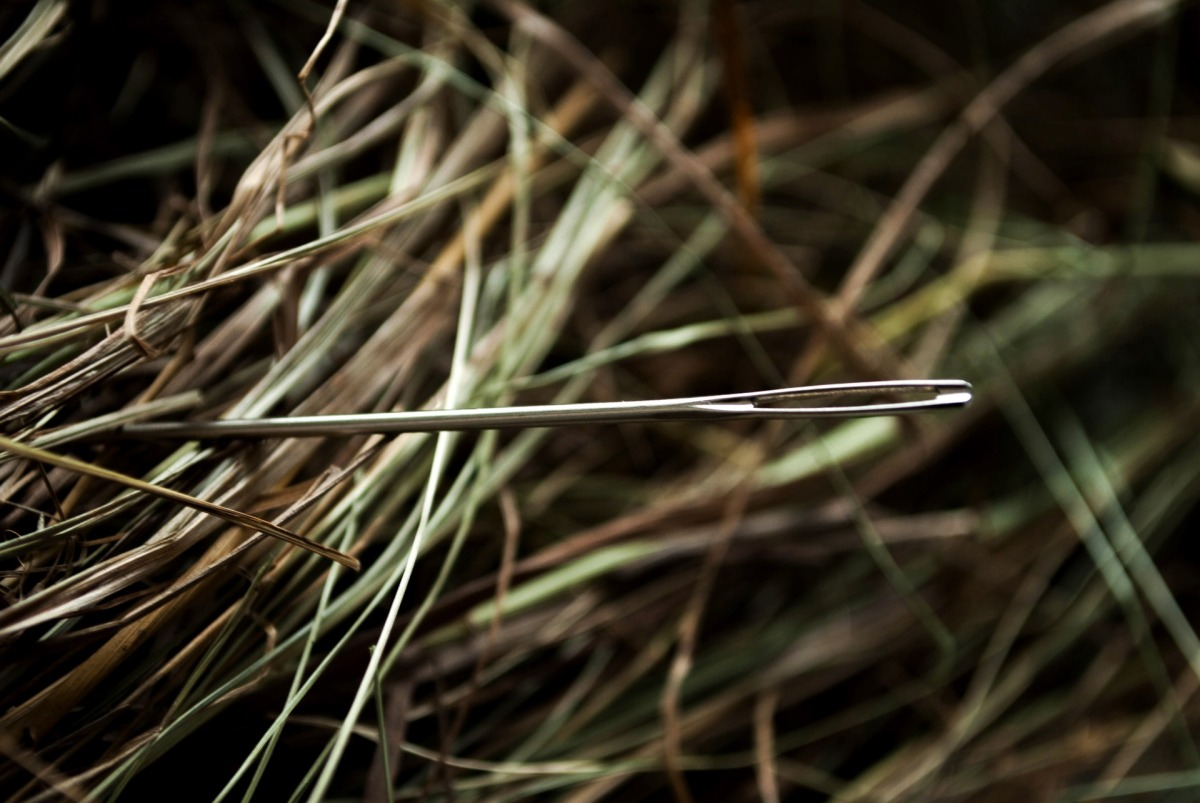
</div>

Une puissance élevée signifie que vous avez de bonnes chances de trouver un effet s'il existe, tandis qu'une faible puissance pourrait vous faire passer à côté de découvertes importantes. La puissance dépend de plusieurs facteurs, notamment la taille de l'échantillon, l'ampleur de l'effet recherché et le niveau de signification statistique choisi. Comprendre et optimiser la puissance statistique aide les chercheurs à concevoir des études plus fiables et à éviter de tirer des conclusions erronées de leurs données.

Dans la réalité, il y a deux possibilités :
1. l'aiguille est dans la botte de foin,
2. l'aiguille n'est pas dans la botte de foin

Si l'on utilisait un test statistique, qui est une procédure de décision entre deux hypothèses, il y a deux possibilités de conclusion :
1. soit le test n'arrive pas à rejeter H0
2. soit le test rejette H0

Si on combine la réalité aux résultats possibles du test (en supposant que H0 = "l'aiguille n'est pas dans la botte de foin") on peut obtenir le tableau suivant :

<table border="1" cellpadding="10" cellspacing="0" style="border-collapse: collapse; width: 80%;">
  <colgroup>
    <col width="10%">
    <col width="30%">
    <col width="30%">
    <col width="30%">
  </colgroup>
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" style="background-color: #e6e6e6;">Réalité (où se trouve l'aiguille 🪡 ?)</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th style="background-color: #f2f2f2;">H0 est vraie<br />(l'aiguille n'est pas dans la botte de foin)</th>
      <th style="background-color: #f2f2f2;">H0 est fausse<br />(l'aiguille est dans la botte de foin)</th>
    </tr>
  </thead>
  <tbody>
    <tr style="width:10%">
      <td rowspan="3" style="background-color: #e6e6e6; writing-mode: vertical-rl; text-orientation: mixed;"><strong>Résultats du test<br />(Que dit le test ?)</strong></td>
    </tr>
    <tr>
      <td style="font-weight: bold;">On ne rejette pas H0<br />(le test dit que l'aiguille n'est pas dans la botte de foin)</td>
      <td style="background-color: #ccffcc;">Décision correcte 🎉<br>(1 - α)</td>
        <td style="background-color: #ffcccc;">Erreur de <strong>deuxième espèce</strong>🛑<br>(Risque β)</td>
    </tr>
    <tr>
      <td style="font-weight: bold;">On rejette H0<br />(le test dit que l'aiguille est dans la botte de foin)</td>
      <td style="background-color: #ffcccc;">Erreur de <strong>première espèce</strong>🛑<br>(Risque α)</td>
      <td style="background-color: #ccffcc;">Décision correcte 🎉<br>(Puissance = 1 - β)</td>
    </tr>
  </tbody>
</table>

On observe qu'on peut avoir une décision correcte du test dans deux cas et une erreur dans deux autres cas. On différencie deux type d'erreur :
1. L'**erreur de première espèce** (aussi appelée erreur de type I), où le test rejette H0 alors que H0 est vraie, c'est-à-dire que le test dit trouver l'aiguille alors qu'il n'y en a pas, c'est un faux-positif.
2. L'**erreur de deuxième espèce** (aussi appelée erreur de type II), où le test accepte H0 alors que H0 est fausse, c'est-à-dire que le test dit ne pas trouver l'aiguille alors qu'il y en bien une, c'est un faux-négatif.

Dans cette partie, nous proposons de tester l’influence de la taille des échantillons et des
conditions initiales sur les risques d’erreur $\alpha$ et $\beta$ lors du test de Student de comparaison de deux
échantillons indépendants.

## 2. Risque d'erreur de première espèce

### Principe

Il représente la probabilité d’adopter l’hypothèse alternative H1 alors qu’en réalité l’hypothèse
nulle H0 est vraie :

$$ \alpha = P(\textrm{rejet de }H_0 | H_0 \textrm{ vraie})$$ 

Lors d’un test, l’expérimentateur est entièrement libre de fixer la limite supérieure de ce
risque d’erreur appelée niveau ou **seuil de significativité** et généralement noté $\alpha$.

Cependant l’usage a consacré comme seuils habituels : 0.05 ou 5% et 0.01 ou 1%. Lorsqu'il nest pas explicitement précisé, la convention générale est de le choisir à 5%, ce que nous ferons ici.

Pour ce TD, l'objectif est d'appréhender des notions statistiques et non pas d'apprendre des nouvelles fonctions sur R, nous allons devoir réaliser des simulations pour évaluer les risques de première et deuxième espèces et donc la totalité du code nécessaire pour le TD vous est fournis. **L'objectif est d'interpréter et comprendre les graphes issus des simulations**.

## Réalisation

Ici, plutôt que de tester si une aiguille est ou non dans une botte de foin, on va chercher à comparer des patients appartenant à différents groupes à l'aide d'un test de Student de comparaison de moyenne d'échantillons indépendants.

Nous allons simuler deux populations qui ont un taux de cholestérol moyen de 1.6 mg/L avec
un écart-type de 0.4 mg/L qui suivent deux lois différentes :
- une population A suit une loi normale
- une population B suit une loi exponentielle

Nous allons simuler également deux autres populations qui ont un taux de cholestérol moyen de
2 mg/L avec un écart-type de 0.4 mg/L qui suivent deux lois différentes :
- une population C suit une loi normale
- une population D suit une loi exponentielle

Ensuite à partir de ces deux populations, nous extrairons dans un premier temps deux échantillons
indépendants A1 et A2 da la population A que nous comparerons avec un test de Student
puis deux échantillons indépendants B1 et B2 de la population B que nous comparerons également
avec un test de Student. Les échantillons appartenant à la même population le test de
student devrait avoir une pvalue supérieure à 0.05 correspondant à l’hypothèse H0.
Nous répèterons cette expérience 1000 fois sur des échantillons de petites tailles puis de tailles
plus grandes.


Pour faciliter ce travail, le code de la fonction vous est donné ci-dessous :  

In [ ]:
# Partie contenant la fonction de comparaison d'échantillons par un test de Student

check.test = function(test, samplesize, sampledist1, sampledist2, count) 
{
  resultat <- rep(0,count)
  for (i in 1:count) 
    resultat[i] <- test(sampledist1(samplesize), sampledist2(samplesize))
  resultat
}

t.test.pvalue = function(x,y) t.test(x,y)$p.value

normalea_egale = function(x) rnorm(x,1.6,0.4)
normalea_different = function(x) rnorm(x,2,0.4)


expalea_egale = function(x) rexp(x,1/1.6)
expalea_different = function(x) rexp(x,1/2)


graph_pvalue=function(taille_echantillon, echantillon, nombre_loi_simuler, loi_echantillon)
{
  if(echantillon == "egaux" & loi_echantillon == "normale")
    plot(
        factor(check.test(t.test.pvalue,taille_echantillon,normalea_egale,normalea_egale,nombre_loi_simuler) > 0.0, levels = c("FALSE", "TRUE")),
        main  = "Echantillons égaux\n(=H0 vraie dans la réalité), loi Normale",
        names = c("Le test rejette H0", "Le test ne rejette pas H0")
    )
  if(echantillon == "different" & loi_echantillon == "normale")
    plot(
        factor(check.test(t.test.pvalue,taille_echantillon,normalea_egale,normalea_different,nombre_loi_simuler) > 0.05, levels = c("FALSE", "TRUE")),
        main  = "Echantillons différents\n(=H0 fausse dans la réalité), loi Normale",
        names = c("Le test rejette H0", "Le test ne rejette pas H0")
     )
  if(echantillon =="egaux" & loi_echantillon =="exponentielle")
    plot(
        factor(check.test(t.test.pvalue,taille_echantillon,expalea_egale,expalea_egale,nombre_loi_simuler) > 0.05, levels = c("FALSE", "TRUE")),
        main  = "Echantillons égaux\n(=H0 vraie dans la réalité), loi exponentielle",
        names = c("Le test rejette H0", "Le test ne rejette pas H0"))
  if(echantillon=="different" & loi_echantillon=="exponentielle")
    plot(
        factor(check.test(t.test.pvalue,taille_echantillon,expalea_egale,expalea_different,nombre_loi_simuler) > 0.05, levels = c("FALSE", "TRUE")),
        main  = "Echantillons différents\n(=H0 fausse dans la réalité), loi exponentielle",
        names = c(`FALSE` = "Le test rejette H0", `TRUE` = "Le test ne rejette pas H0")
    )
}

La fonction `graph_pvalue()` réalise une série de tests de Student sur plusieurs échantillons et 
renvoie un graphique représentant les décisions prises par le test. Cette fonction accepte trois
arguments :

- **`taille_echantillon`** : c'est la taille des échantillons qui vont être extraits des populations,
- **`echantillon`** : soit `"egaux"` et les deux
échantillons sont extraits d’une même population, soit `"different"`et les deux échantillons sont
extrait de deux populations différentes mais de même loi de distribution (A et C ou B et D)
- **`nombre_loi_simuler`** : nombre d’échantillons extraits de la population ce qui correspond aux nombres
de tests de Student que l’on effectuera
- **`loi_echantillon`** : la loi des populations choisies, soit `"normale"` soit `"exponentielle"`

### Grands échantillons

**Premier exemple** : Simulons 1000 couples de deux échantillons appartenant à une même
population, de grandes tailles (n=100) et suivant une loi normale ou une loi exponentielle

In [ ]:
# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi normale
graph_pvalue(100,"egaux",1000,"normale")

In [ ]:
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(100,"egaux",1000,"exponentielle")

**Interprétation** :



### Petits échantillons

**Deuxième exemple** : Simulons 1000 couples de deux échantillons appartenant à une même
population, de petite taille (n=5), suivant une loi normale ou une loi exponentielle

In [ ]:
# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi normale
graph_pvalue(5,"egaux",1000,"normale")

# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi exponentielle
graph_pvalue(5,"egaux",1000,"exponentielle")

**Interprétation** : 


Vous pouvez vous entrainer à tester d'autres simulations. 

## 3. Risque d'erreur de deuxième espèce 

### Principe

Il représente la probabilité d’accepter H0 alors qu’en réalité H1 est vraie :

$$ \beta = P(\textrm{acceptation de } H_0 | H_0 \textrm{ est fausse})$$

$\beta$ caractérise le manque de puissance du test c’est à dire son incapacité à mettre en évidence
une différence existant réellement entre les paramètres comparés.

1 - $\beta$ caractérise **la puissance du test**. Elle est fonction de la forme de l’hypothèse alternative
et pour une valeur de $\alpha$ fixée, est d’autant meilleure que la **taille des échantillons utilisée est
importante.**
Dans les tests habituels, avec des effectifs d’échantillons fixés par l’expérimentateur, plus
$\alpha$ est choisi petit, plus la valeur de $\beta$ augmente et réciproquement : ainsi les deux risques d’erreur
sont liés. En général, ces risques sont choisis de manière à être du même ordre de grandeur.

<img src="Figures/TD1_18.jpeg" />


La puissance d’un test est fonction de la nature de H1, un test unilatéral est plus puissant qu’un
test bilatéral. Elle augmente avec la taille de l’échantillon $N$ étudié à valeur de $\alpha$ constant et
diminue lorsque $\alpha$ diminue.

### Grands échantillons

**Troisième exemple** : Simulons 1000 couples de deux échantillons appartenant à deux populations
différentes de grande taille (n=100), suivant une loi normale (testons la population A
contre la C) ou une loi exponentielle (Testons la populations B contre la D)

In [ ]:
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi normale
graph_pvalue(100,"different",1000,"normale")

# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(100,"different",1000,"exponentielle")

Lorsque l’on compare deux populations différentes de grands échantillons (n=100) et suivant
une loi normale le test de Student rejette systématiquement l’hypothèse H0. En revanche, si les
deux échantillons suivent une loi exponentielle dans ce cas, le test de Student se trompe souvent
(H0 n’est pas rejetée dans la majorité des cas ce qui correspond à une réponse fausse du test).


### Petits échantillons

**Quatrième exemple** : Simulons 1000 couples de deux échantillons appartenant à deux populations
différentes et de petite taille (n=5) et suivant une loi normale (testons la population A
contre la C) ou une loi exponentielle (Testons la populations B contre la D)



In [ ]:
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi normale
graph_pvalue(5,"different",1000,"normale")

# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(5,"different",1000,"exponentielle")

Lorsque l’on compare deux populations différentes de petits échantillons (n=5) et suivant
une loi normale le test de Student rejette très souvent H0, mais il se trompe quand même. En
revanche, si les deux échantillons suivent une loi exponentielle dans ce cas, le test de Student
se trompe dans la grande majorité des cas (H0 n’est pas rejetée dans la majorité des cas ce qui
correspond à une réponse fausse du test).


**Pour conclure : la puissance du test de Student dépend fortement de la taille de l’échantillon,
plus elle est grande et plus le test est puissance. Lorsque la taille de l’échantillon
est faible, on observe également que la condition de normalité des données améliore la
puissance du test.**

<div class="alert alert-success">

## En résumé

Dans cette séance :

- Nous avons appris à différencier les deux types d'erreur
- L'erreur de première espèce correspond à rejeter faussement H0 (dans la réalité H0 est vraie), on le note $\alpha$ et il est fixé par l'expérimentatrice⋅eur
- L'erreur de deuxième espèces correspond à accepter faussement (dans la réalité H0 est faux), on le note $1 - \beta$, il s'agit de la **puissance** d'un test statistique, qui dépend du test utilisé, de la taille des échantillons et de leurs distributions
- La puissance est d'autant plus faible que la taille des échantillons est faible
- Pour un test de Student, la puissance est plus faible avec des échantillons ayant des distributions non-normales

</div>